# Allocation History Visualization

This notebook visualizes the allocation and fair share data from the time-aware fairness test.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)


In [2]:
# Load the data
df = pd.read_csv('allocation_history_oscillating.csv')
#df = pd.read_csv('allocation_history_burst.csv')
#df = pd.read_csv('allocation_history_3-way-oscillation.csv')
# Display basic information
print("Data shape:", df.shape)
print("\nFirst few rows:")
print(df.head(10))
print("\nUnique queues:")
print(df['QueueID'].unique())
print("\nTime range:", df['Time'].min(), "to", df['Time'].max())


Data shape: (3072, 4)

First few rows:
   Time          QueueID  Allocation  FairShare
0     0  test-department        16.0       16.0
1     0      test-queue1        16.0        8.0
2     0      test-queue2         0.0        8.0
3     1  test-department        16.0       16.0
4     1      test-queue1        16.0        8.0
5     1      test-queue2         0.0        8.0
6     2  test-department        16.0       16.0
7     2      test-queue1         0.0        0.0
8     2      test-queue2         0.0       16.0
9     3  test-department        16.0       16.0

Unique queues:
['test-department' 'test-queue1' 'test-queue2']

Time range: 0 to 1023


In [3]:
# Pivot the data for easier plotting
allocation_pivot = df.pivot(index='Time', columns='QueueID', values='Allocation')
fairshare_pivot = df.pivot(index='Time', columns='QueueID', values='FairShare')

print("Allocation data:")
print(allocation_pivot.head())
print("\nFair Share data:")
print(fairshare_pivot.head())


Allocation data:
QueueID  test-department  test-queue1  test-queue2
Time                                              
0                   16.0         16.0          0.0
1                   16.0         16.0          0.0
2                   16.0          0.0          0.0
3                   16.0          0.0         16.0
4                   16.0          0.0         16.0

Fair Share data:
QueueID  test-department  test-queue1  test-queue2
Time                                              
0                   16.0          8.0          8.0
1                   16.0          8.0          8.0
2                   16.0          0.0         16.0
3                   16.0          4.0         12.0
4                   16.0          6.0         10.0


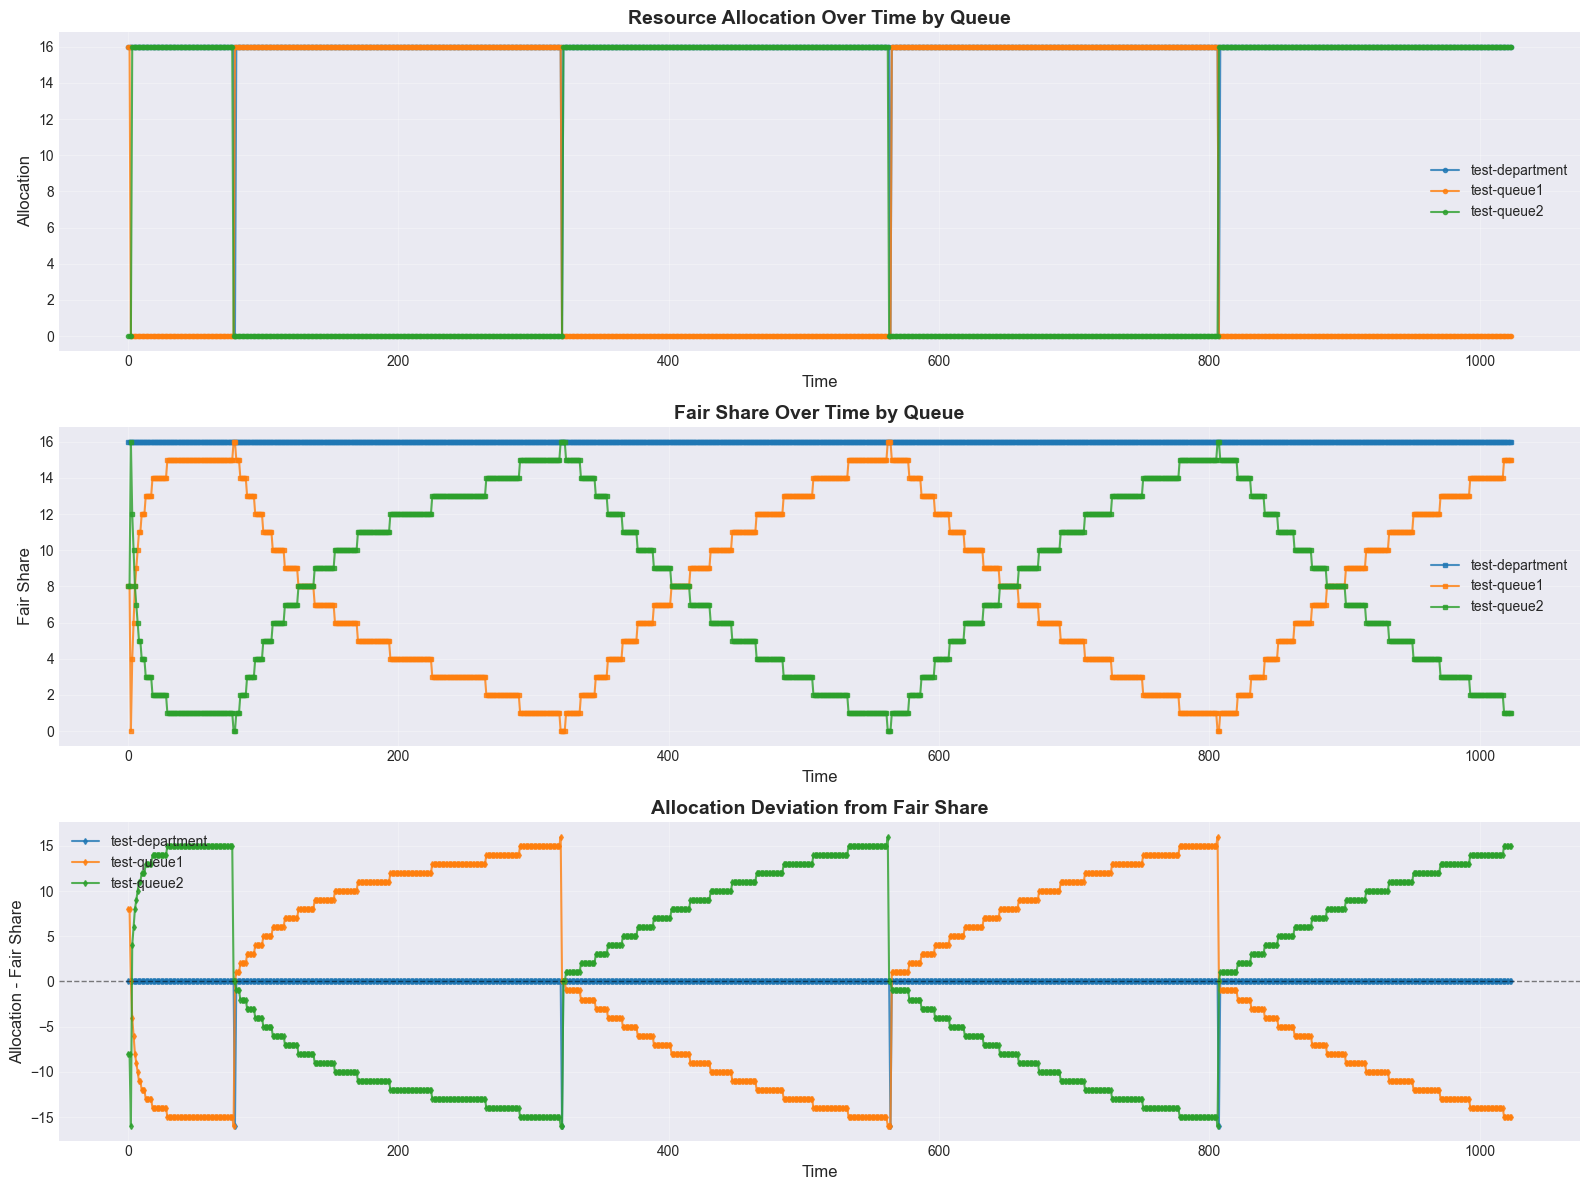

In [4]:
# Create a comprehensive visualization
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Plot 1: Allocation over time for all queues
for queue in allocation_pivot.columns:
    axes[0].plot(allocation_pivot.index, allocation_pivot[queue], 
                 marker='o', markersize=3, label=queue, linewidth=1.5, alpha=0.8)
axes[0].set_xlabel('Time', fontsize=12)
axes[0].set_ylabel('Allocation', fontsize=12)
axes[0].set_title('Resource Allocation Over Time by Queue', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot 2: Fair Share over time for all queues
for queue in fairshare_pivot.columns:
    axes[1].plot(fairshare_pivot.index, fairshare_pivot[queue], 
                 marker='s', markersize=3, label=queue, linewidth=1.5, alpha=0.8)
axes[1].set_xlabel('Time', fontsize=12)
axes[1].set_ylabel('Fair Share', fontsize=12)
axes[1].set_title('Fair Share Over Time by Queue', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

# Plot 3: Allocation vs Fair Share comparison
for queue in allocation_pivot.columns:
    diff = allocation_pivot[queue] - fairshare_pivot[queue]
    axes[2].plot(allocation_pivot.index, diff, 
                 marker='d', markersize=3, label=queue, linewidth=1.5, alpha=0.8)
axes[2].axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
axes[2].set_xlabel('Time', fontsize=12)
axes[2].set_ylabel('Allocation - Fair Share', fontsize=12)
axes[2].set_title('Allocation Deviation from Fair Share', fontsize=14, fontweight='bold')
axes[2].legend(fontsize=10)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


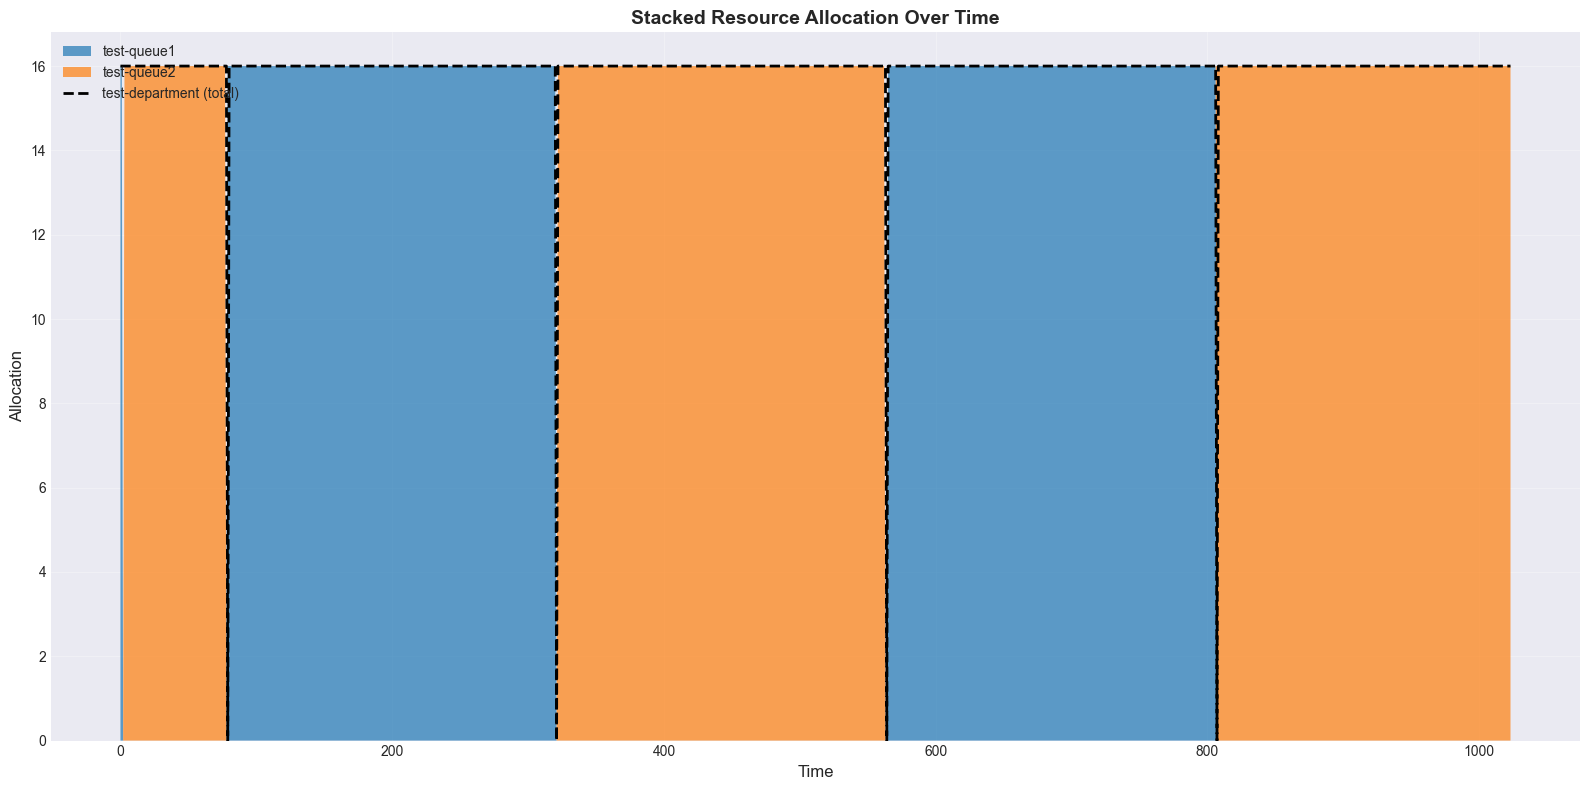

In [5]:
# Stacked area chart to show total resource usage
fig, ax = plt.subplots(figsize=(16, 8))

# Only stack the leaf queues (not the parent department)
leaf_queues = [q for q in allocation_pivot.columns if 'test-queue' in q]
ax.stackplot(allocation_pivot.index, 
             *[allocation_pivot[q] for q in leaf_queues],
             labels=leaf_queues, alpha=0.7)

# Add department allocation as a reference line
if 'test-department' in allocation_pivot.columns:
    ax.plot(allocation_pivot.index, allocation_pivot['test-department'],
            color='black', linewidth=2, label='test-department (total)', linestyle='--')

ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Allocation', fontsize=12)
ax.set_title('Stacked Resource Allocation Over Time', fontsize=14, fontweight='bold')
ax.legend(fontsize=10, loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [6]:
# Calculate and display statistics
print("=" * 80)
print("ALLOCATION STATISTICS")
print("=" * 80)
print("\nMean Allocation:")
print(allocation_pivot.mean())
print("\nStandard Deviation:")
print(allocation_pivot.std())
print("\nMin/Max Allocation:")
print(allocation_pivot.agg(['min', 'max']))

print("\n" + "=" * 80)
print("FAIRNESS ANALYSIS")
print("=" * 80)
for queue in allocation_pivot.columns:
    diff = allocation_pivot[queue] - fairshare_pivot[queue]
    print(f"\n{queue}:")
    print(f"  Mean deviation from fair share: {diff.mean():.4f}")
    print(f"  Std deviation: {diff.std():.4f}")
    print(f"  Time above fair share: {(diff > 0).sum()} / {len(diff)} ({100 * (diff > 0).sum() / len(diff):.1f}%)")
    print(f"  Time below fair share: {(diff < 0).sum()} / {len(diff)} ({100 * (diff < 0).sum() / len(diff):.1f}%)")
    print(f"  Time at fair share: {(diff == 0).sum()} / {len(diff)} ({100 * (diff == 0).sum() / len(diff):.1f}%)")


ALLOCATION STATISTICS

Mean Allocation:
QueueID
test-department    15.937500
test-queue1         7.593750
test-queue2         8.328125
dtype: float64

Standard Deviation:
QueueID
test-department    0.998533
test-queue1        7.993582
test-queue2        7.997174
dtype: float64

Min/Max Allocation:
QueueID  test-department  test-queue1  test-queue2
min                  0.0          0.0          0.0
max                 16.0         16.0         16.0

FAIRNESS ANALYSIS

test-department:
  Mean deviation from fair share: -0.0625
  Std deviation: 0.9985
  Time above fair share: 0 / 1024 (0.0%)
  Time below fair share: 4 / 1024 (0.4%)
  Time at fair share: 1020 / 1024 (99.6%)

test-queue1:
  Mean deviation from fair share: -0.3662
  Std deviation: 10.7984
  Time above fair share: 485 / 1024 (47.4%)
  Time below fair share: 533 / 1024 (52.1%)
  Time at fair share: 6 / 1024 (0.6%)

test-queue2:
  Mean deviation from fair share: 0.2881
  Std deviation: 10.7892
  Time above fair share: 530 / 102

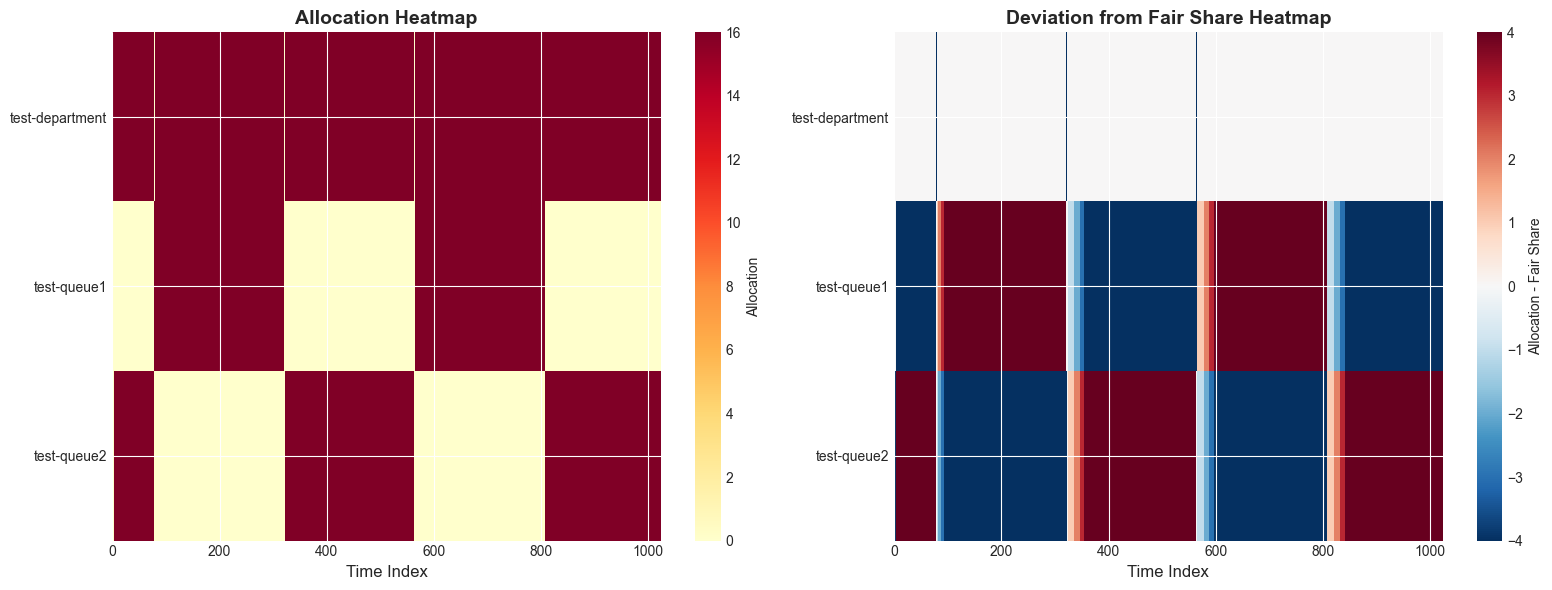

In [7]:
# Heatmap visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Allocation heatmap
im1 = axes[0].imshow(allocation_pivot.T, aspect='auto', cmap='YlOrRd', interpolation='nearest')
axes[0].set_yticks(range(len(allocation_pivot.columns)))
axes[0].set_yticklabels(allocation_pivot.columns)
axes[0].set_xlabel('Time Index', fontsize=12)
axes[0].set_title('Allocation Heatmap', fontsize=14, fontweight='bold')
plt.colorbar(im1, ax=axes[0], label='Allocation')

# Deviation heatmap
deviation = allocation_pivot - fairshare_pivot
im2 = axes[1].imshow(deviation.T, aspect='auto', cmap='RdBu_r', interpolation='nearest',
                     vmin=-4, vmax=4)
axes[1].set_yticks(range(len(deviation.columns)))
axes[1].set_yticklabels(deviation.columns)
axes[1].set_xlabel('Time Index', fontsize=12)
axes[1].set_title('Deviation from Fair Share Heatmap', fontsize=14, fontweight='bold')
plt.colorbar(im2, ax=axes[1], label='Allocation - Fair Share')

plt.tight_layout()
plt.show()
